# Plot learning curve

In [1]:
import os
import numpy as np
import pickle

%reload_ext autoreload
%autoreload 2

In [2]:
'''
path = '../Data/CompassWorld/'

files = os.listdir(path)
lossesPickled = [file for file in files if 'loss' in file]
'''


path = '../Data/RingWorld/'
type = 'Simple' # Simple or Random

files = os.listdir(path)
lossesPickled = [file for file in files if type in file and 'loss' in file]
observationsPickled = [file for file in files if type in file and 'observations' in file]

losses = []
observations = []

for i in range(len(lossesPickled)):
    losses.append(pickle.load(open(path+lossesPickled[i], 'rb')))
    observations.append(pickle.load(open(path+observationsPickled[i], 'rb')))

print(losses)

[array([0.00399851, 1.06643569, 0.00496784, ..., 0.00387587, 0.00958735,
       0.89615124]), array([1.07544243e-01, 4.62719679e-01, 2.16392484e-02, ...,
       6.68342574e-04, 1.37766090e-03, 9.38453496e-01]), array([0.00268897, 0.00454943, 0.01102099, ..., 0.58464915, 0.05415292,
       0.030499  ]), array([0.06732846, 0.0286434 , 0.04000368, ..., 0.08294296, 0.02056718,
       0.01983807]), array([6.23452477e-04, 4.05045925e-03, 7.65290097e-05, ...,
       4.35947021e-03, 1.93631854e-02, 6.99152891e-03])]


In [3]:
losses0 = []
losses1 = []

for i in range(len(losses)):
    temp_losses0 = []
    temp_losses1 = []
    
    for j in range(len(losses[i])):
        
        if observations[i][j] == 0:
            temp_losses0.append(losses[i][j])
            temp_losses1.append(-1)
            
        elif observations[i][j] == 1:
            temp_losses1.append(losses[i][j])
            temp_losses0.append(-1)

    losses0.append(temp_losses0)
    losses1.append(temp_losses1)

In [4]:

#Binning - bin size = 100

bin_size = 1000

binned_losses0 = []
binned_losses1 = []
binned_losses = []


for i in range(len(losses0)):
    temp_binned_losses0 = []
    
    for j in range(0, len(losses0[i]), bin_size):
        current = j
        next = j + bin_size
        
        if next > len(losses0[i]):
            next = len(losses0[i])
            
        sum = 0
        count = 0
        for k in range(current, next):
            if losses0[i][k] != -1:
                sum += losses0[i][k]
                count += 1
        
        if count == 0:
            average = 0
        else:
            average = sum * 1.0 / count
        
        for k in range(current, next):
            temp_binned_losses0.append(average)
            
    binned_losses0.append(temp_binned_losses0)

for i in range(len(losses1)):
    temp_binned_losses1 = []
    
    for j in range(0, len(losses1[i]), bin_size):
        current = j
        next = j + bin_size
        if next > len(losses1[i]):
            next = len(losses1[i])
            
        sum = 0
        count = 0
        for k in range(current, next):
            if losses1[i][k] != -1:
                sum += losses1[i][k]
                count += 1
                
        if count == 0:
            average = 0
        else:
            average = sum * 1.0 / count

        for k in range(current, next):
            temp_binned_losses1.append(average)
            
    binned_losses1.append(temp_binned_losses1)


sliding_window = 1000
losses = np.array(losses)
binned_losses0 = np.array(binned_losses0)
binned_losses1 = np.array(binned_losses1)

import numpy as np

sliding_losses = []
sliding_losses0 = []
sliding_losses1 = []

for i in range(len(losses)):
    sliding_losses.append(list(np.convolve(losses[i], np.ones(sliding_window)/sliding_window, 'valid')))

for i in range(len(binned_losses0)):
    sliding_losses0.append(list(np.convolve(binned_losses0[i], np.ones(sliding_window)/sliding_window, 'valid')))

for i in range(len(binned_losses1)):
    sliding_losses1.append(list(np.convolve(binned_losses1[i], np.ones(sliding_window)/sliding_window, 'valid')))    

'''
for i in range(len(losses)):
    temp_slide_losses = []
    
    for j in range(0, len(losses[i]), bin_size):
        current = j
        next = j + bin_size
        
        if next > len(losses[i]):
            next = len(losses[i])
            
        sum = 0
        count = 0
        for k in range(current, next):
            if losses[i][k] != -1:
                sum += losses[i][k]
                count += 1
        
        if count == 0:
            average = 0
        else:
            average = sum * 1.0 / count
        
        for k in range(current, next):
            temp_binned_losses.append(average)
            
    binned_losses.append(temp_binned_losses)
'''

'\nfor i in range(len(losses)):\n    temp_slide_losses = []\n    \n    for j in range(0, len(losses[i]), bin_size):\n        current = j\n        next = j + bin_size\n        \n        if next > len(losses[i]):\n            next = len(losses[i])\n            \n        sum = 0\n        count = 0\n        for k in range(current, next):\n            if losses[i][k] != -1:\n                sum += losses[i][k]\n                count += 1\n        \n        if count == 0:\n            average = 0\n        else:\n            average = sum * 1.0 / count\n        \n        for k in range(current, next):\n            temp_binned_losses.append(average)\n            \n    binned_losses.append(temp_binned_losses)\n'

In [5]:

from stats import getMean, getMedian, getBest, getWorst, getConfidenceIntervalOfMean, getRegion

# Add color, linestyles as needed

def plotMean(xAxis, data, color, label):
    mean = getMean(data)
    plt.plot(xAxis, mean, color=color, label=label)

def plotMedian(xAxis, data, color):
    median = getMedian(data)
    plt.plot(xAxis, median, label=alg+'-median', color=color)

def plotBest(xAxis, data, transformation, color):
    best = getBest(data, transformation)
    plt.plot(xAxis, best, label=alg+'-best', color=color)

def plotWorst(xAxis, data, transformation, color):
    worst = getWorst(data,  transformation)
    plt.plot(xAxis, worst, label=alg+'-worst', color=color)

def plotMeanAndConfidenceInterval(xAxis, data, confidence, color, label):
    plotMean(xAxis, data, color=color, label=label)
    lowerBound, upperBound = getConfidenceIntervalOfMean(data, confidence)
    plt.fill_between(xAxis, lowerBound, upperBound, alpha=0.25, color=color)

def plotMeanAndPercentileRegions(xAxis, data, lower, upper, color, label):
    plotMean(xAxis, data, color, label)
    lowerRun, upperRun = getRegion(data, lower, upper)
    plt.fill_between(xAxis, lowerRun, upperRun, alpha=0.25, color=color, label=label)



<IPython.core.display.Javascript object>


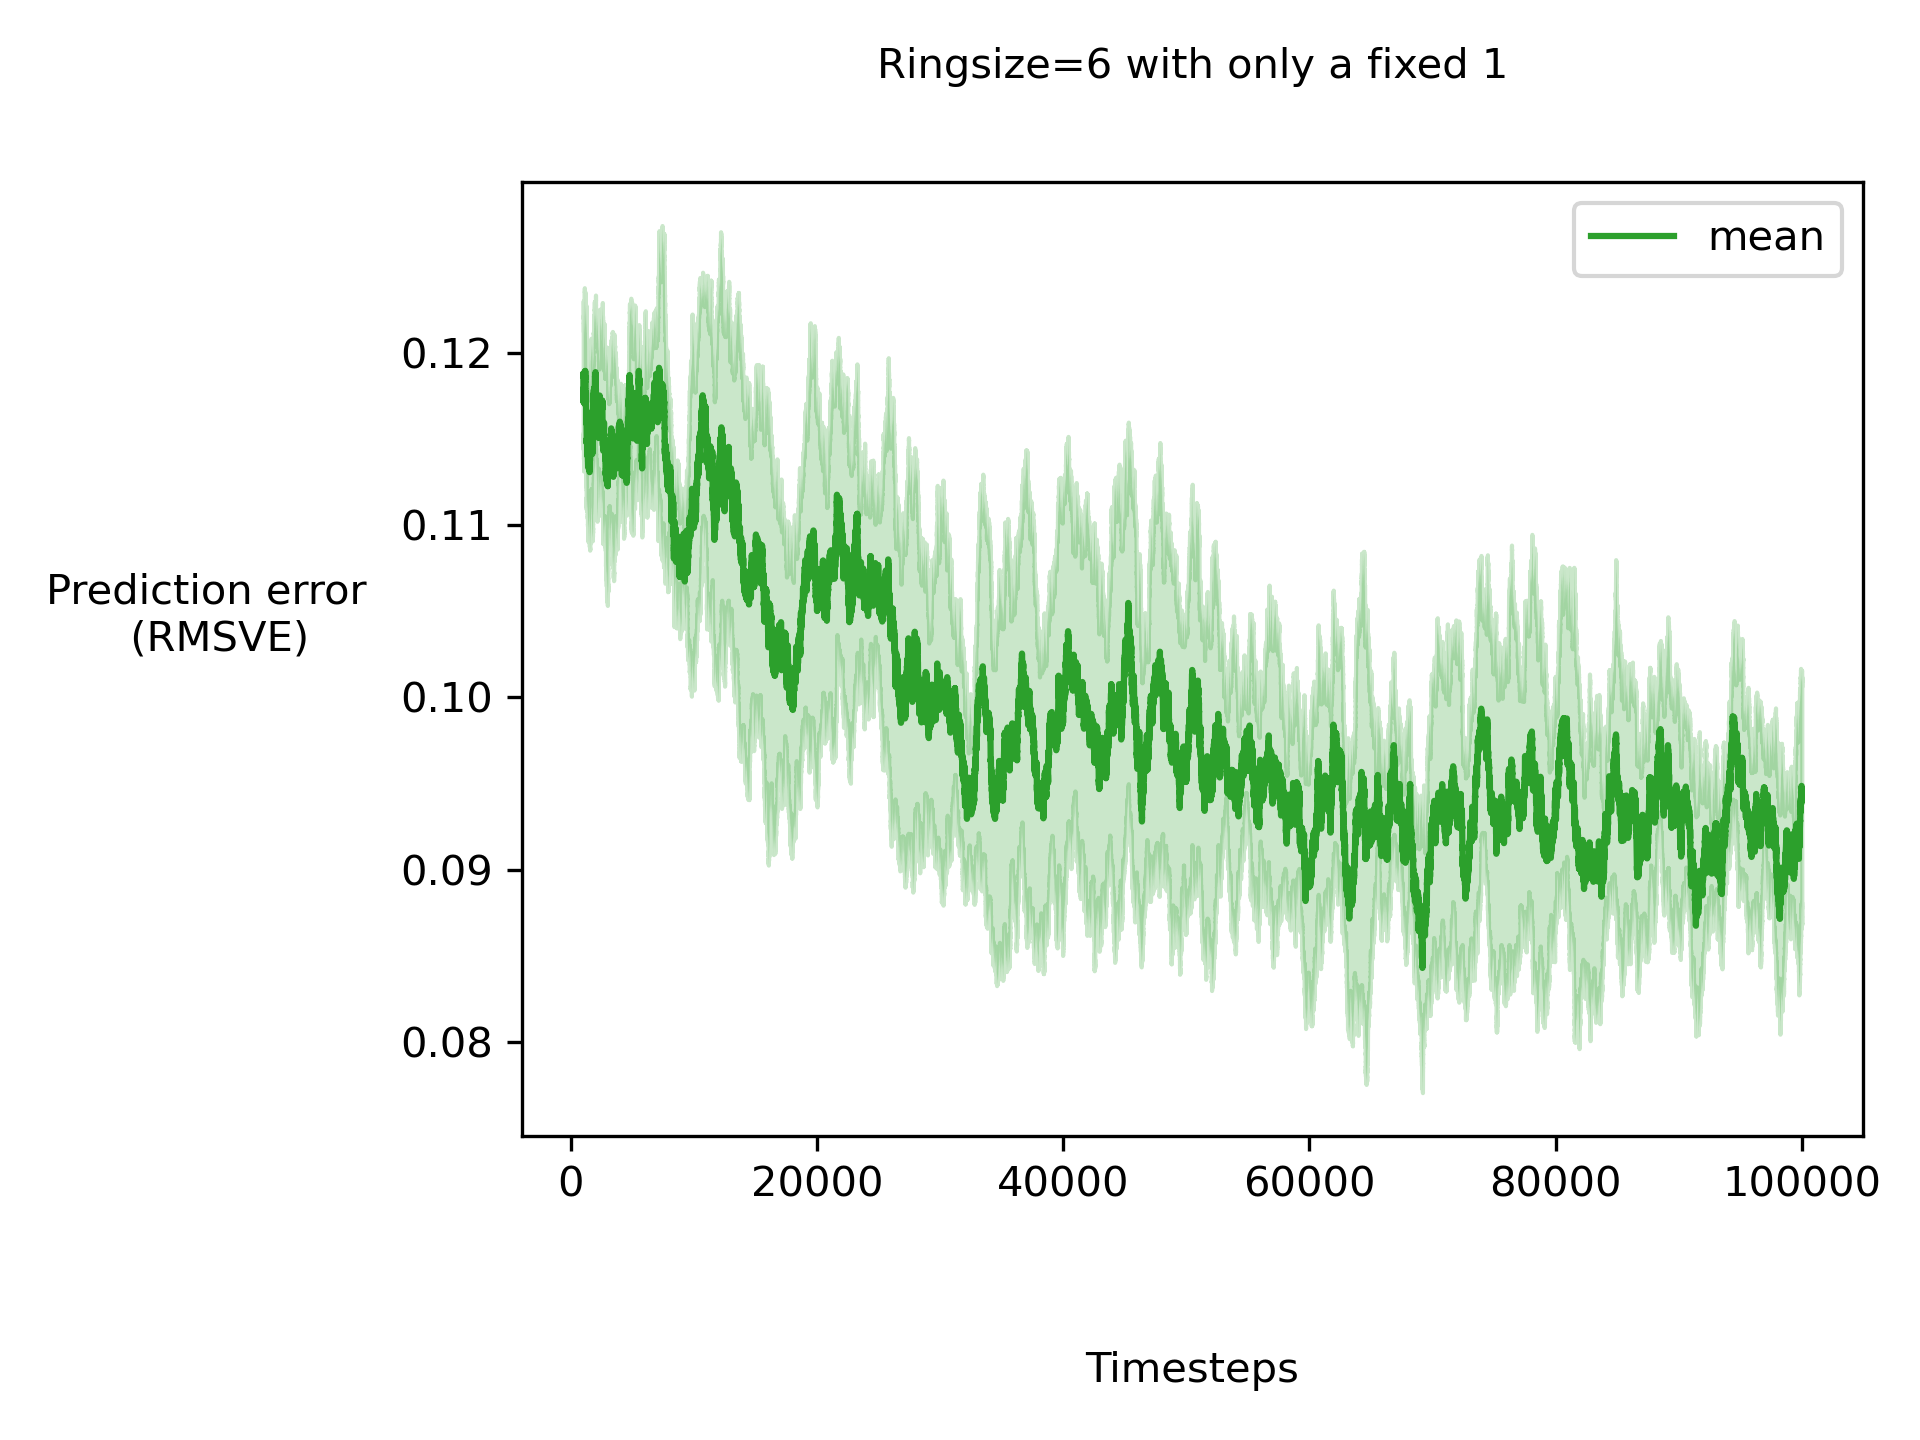

In [6]:
#path = '../Data/RingWorld/'
#type = 'Simple256_0001' # Simple or Random

#files = os.listdir(path)
#lossesPickled = [file for file in files if type in file and 'loss' in file]


#losses = []

#for i in range(len(lossesPickled)):
#    losses.append(pickle.load(open(path+lossesPickled[i], 'rb')))

# For saving figures
#%matplotlib inline

# For plotting in the jupyter notebook
%matplotlib notebook

#losses0 = []
#timesteps0 = []

#losses0 = [losses[i] for i in range(len(losses)) if rewards[i] == 0]
#timesteps0 = [i for i in range(len(losses)) if rewards[i] == 0]
#losses1 = [losses[i] for i in range(len(losses)) if rewards[i] == 1]
#timesteps1 = [i for i in range(len(losses)) if rewards[i] == 1]

plot_losses = np.array([np.array(i) for i in sliding_losses])
plot_losses0 = np.array([np.array(i) for i in sliding_losses0])
plot_losses1 = np.array([np.array(i) for i in sliding_losses1])
timesteps_individual = np.array([i+1 for i in range(len(plot_losses0[0]))])
timesteps_both = np.array([i+1 for i in range(len(plot_losses[0]))])

#plot_losses = np.array([np.array(i) for i in losses])
#timesteps = np.array([i+1 for i in range(len(plot_losses[0]))])


import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#plotMeanAndPercentileRegions(timesteps, plot_losses0, lower=0.025, upper=0.975, color=colors[0], label='0 observation mean')
#plotMeanAndPercentileRegions(timesteps, plot_losses1, lower=0.025, upper=0.975, color=colors[1], label='1 observation mean')


#plotMeanAndConfidenceInterval(timesteps_individual + sliding_window - 1, plot_losses1, 0.95, color=colors[1], label='1 observation mean')
#plotMeanAndConfidenceInterval(timesteps_individual + sliding_window - 1, plot_losses0, 0.95, color=colors[0], label='0 observation mean')
#plt.plot(timesteps, plot_losses1[0], color=colors[1], label='1 observation mean')
#plt.plot(timesteps, plot_losses0[0], color=colors[0], label='0 observation mean')

#plotMeanAndConfidenceInterval(timesteps, plot_losses1, 0.95, color=colors[1], label='1 observation mean')
#plotMeanAndConfidenceInterval(timesteps, plot_losses0, 0.95, color=colors[0], label='0 observation mean')

plotMeanAndConfidenceInterval(timesteps_both + sliding_window - 1, plot_losses, 0.95, color=colors[2], label='mean')
#plt.plot(timesteps, plot_losses[0], color=colors[1], label='mean')

#plt.plot(timesteps1, losses1, color=colors[1], label='1 observation')
#plt.plot(timesteps0, losses0, color=colors[0], label='0 observation')

plt.title('Ringsize=6 with only a fixed 1', pad=25, fontsize=10)
plt.xlabel('Timesteps', labelpad=35)
plt.ylabel('Prediction error \n (RMSVE)', rotation=0, labelpad=45)
plt.rcParams['figure.figsize'] = [8, 5.33]
plt.legend(loc=0)
plt.yticks()
plt.xticks()
plt.tight_layout()

#plt.savefig('../images/RingWorld_2stepBPTT_wholeseq.png',dpi=500, bbox_inches='tight')